<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.042500,85.325145,28.032727,-10.126513,152.273858,164.371991,-12.098133
1,0.0,1.0,76.918489,95.591587,98.573457,-39.463957,241.619576,287.922360,-46.302784
2,0.0,2.0,39.675414,70.548068,31.163764,31.096565,182.483811,152.523098,29.960713
3,0.0,3.0,87.795897,51.999547,85.397470,-32.663021,202.529893,237.675298,-35.145405
4,0.0,4.0,58.707751,28.815874,64.585793,2.458836,164.568254,162.216423,2.351831
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.088637,60.100733,92.829694,-32.976916,153.042148,184.913717,-31.871569
119996,999.0,116.0,26.383132,36.520419,94.916562,13.314097,181.134210,171.592649,9.541561
119997,999.0,117.0,25.741846,61.162248,66.979299,4.928085,168.811478,161.794601,7.016877
119998,999.0,118.0,97.413372,45.666168,52.523111,5.153879,210.756530,205.589046,5.167484


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.042500,85.325145,28.032727,-10.126513,152.273858,164.371991,-12.098133
1,0.0,1.0,76.918489,95.591587,98.573457,-39.463957,241.619576,287.922360,-46.302784
2,0.0,2.0,39.675414,70.548068,31.163764,31.096565,182.483811,152.523098,29.960713
3,0.0,3.0,87.795897,51.999547,85.397470,-32.663021,202.529893,237.675298,-35.145405
4,0.0,4.0,58.707751,28.815874,64.585793,2.458836,164.568254,162.216423,2.351831
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.088637,60.100733,92.829694,-32.976916,153.042148,184.913717,-31.871569
119996,999.0,116.0,26.383132,36.520419,94.916562,13.314097,181.134210,171.592649,9.541561
119997,999.0,117.0,25.741846,61.162248,66.979299,4.928085,168.811478,161.794601,7.016877
119998,999.0,118.0,97.413372,45.666168,52.523111,5.153879,210.756530,205.589046,5.167484


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    39.042500  85.325145  28.032727  ...  152.273858  164.371991 -12.098133
      1.0    76.918489  95.591587  98.573457  ...  241.619576  287.922360 -46.302784
      2.0    39.675414  70.548068  31.163764  ...  182.483811  152.523098  29.960713
      3.0    87.795897  51.999547  85.397470  ...  202.529893  237.675298 -35.145405
      4.0    58.707751  28.815874  64.585793  ...  164.568254  162.216423   2.351831
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  23.088637  60.100733  92.829694  ...  153.042148  184.913717 -31.871569
      116.0  26.383132  36.520419  94.916562  ...  181.134210  171.592649   9.541561
      117.0  25.741846  61.162248  66.979299  ...  168.811478  161.794601   7.016877
      118.0  97.413372  45.666168  52.523111  ...  210.756530  205.589046   5.167484
      119.0  84.227449  48.490142  52.190647  ...  189.932194  194.432827  -4.500633

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    39.042500  85.325145  28.032727  ...  152.273858  164.371991 -12.098133
      1.0    76.918489  95.591587  98.573457  ...  241.619576  287.922360 -46.302784
      2.0    39.675414  70.548068  31.163764  ...  182.483811  152.523098  29.960713
      3.0    87.795897  51.999547  85.397470  ...  202.529893  237.675298 -35.145405
      4.0    58.707751  28.815874  64.585793  ...  164.568254  162.216423   2.351831
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  23.088637  60.100733  92.829694  ...  153.042148  184.913717 -31.871569
      116.0  26.383132  36.520419  94.916562  ...  181.134210  171.592649   9.541561
      117.0  25.741846  61.162248  66.979299  ...  168.811478  161.794601   7.016877
      118.0  97.413372  45.666168  52.523111  ...  210.756530  205.589046   5.167484
      119.0  84.227449  48.490142  52.190647  ...  189.932194  194.432827  -4.500633

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.042500,85.325145,28.032727,-10.126513,152.273858,164.371991,-12.098133
1,0.0,1.0,76.918489,95.591587,98.573457,-39.463957,241.619576,287.922360,-46.302784
2,0.0,2.0,39.675414,70.548068,31.163764,31.096565,182.483811,152.523098,29.960713
3,0.0,3.0,87.795897,51.999547,85.397470,-32.663021,202.529893,237.675298,-35.145405
4,0.0,4.0,58.707751,28.815874,64.585793,2.458836,164.568254,162.216423,2.351831
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.088637,60.100733,92.829694,-32.976916,153.042148,184.913717,-31.871569
119996,999.0,116.0,26.383132,36.520419,94.916562,13.314097,181.134210,171.592649,9.541561
119997,999.0,117.0,25.741846,61.162248,66.979299,4.928085,168.811478,161.794601,7.016877
119998,999.0,118.0,97.413372,45.666168,52.523111,5.153879,210.756530,205.589046,5.167484


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    39.042500  85.325145  28.032727  ...  152.273858  164.371991 -12.098133
      1.0    76.918489  95.591587  98.573457  ...  241.619576  287.922360 -46.302784
      2.0    39.675414  70.548068  31.163764  ...  182.483811  152.523098  29.960713
      3.0    87.795897  51.999547  85.397470  ...  202.529893  237.675298 -35.145405
      4.0    58.707751  28.815874  64.585793  ...  164.568254  162.216423   2.351831
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  23.088637  60.100733  92.829694  ...  153.042148  184.913717 -31.871569
      116.0  26.383132  36.520419  94.916562  ...  181.134210  171.592649   9.541561
      117.0  25.741846  61.162248  66.979299  ...  168.811478  161.794601   7.016877
      118.0  97.413372  45.666168  52.523111  ...  210.756530  205.589046   5.167484
      119.0  84.227449  48.490142  52.190647  ...  189.932194  194.432827  -4.500633

[120000 rows x 7 columns]

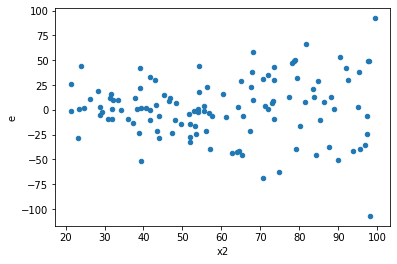

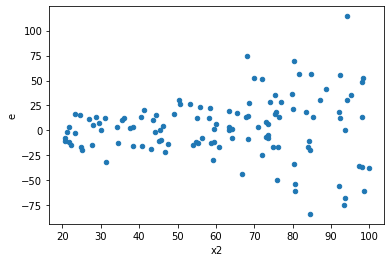

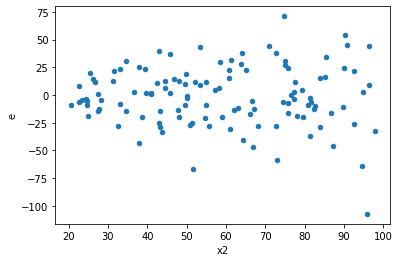

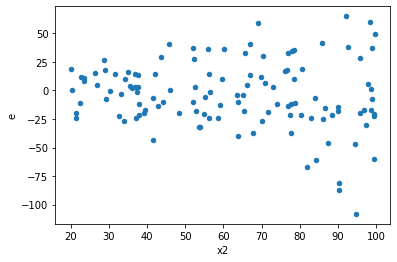

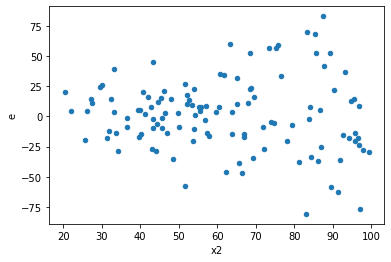

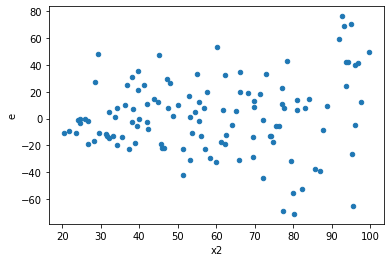

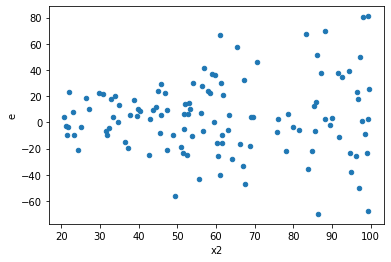

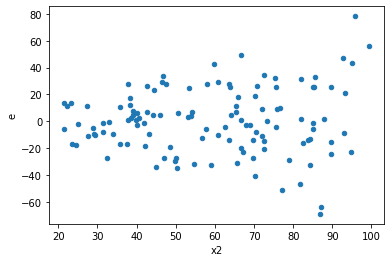

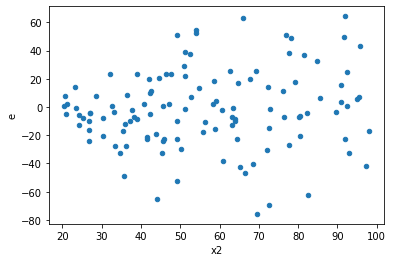

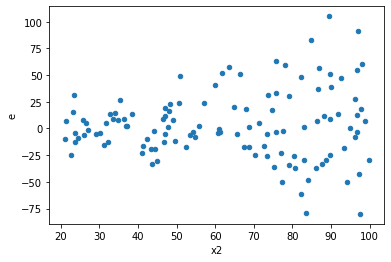

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,15415.918616488638,73249.03914686012,342.57596925530305,1627.7564254857803,4.751519579800715,6.78642438245447e-07,0.9999996606787809,3.393212191227235e-07,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,9418.662636427987,84251.60130212667,209.30361414284417,1872.257806713926,8.945176672564095,1.6977530492567894e-11,0.9999999999915112,8.488765246283947e-12,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,14982.187531710442,49279.77902220328,332.9375007046765,1095.1062004934063,3.2892245486782565,0.0001118740784891159,0.9999440629607554,5.593703924455795e-05,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,14335.49705132435,65754.94544422219,318.5666011405411,1461.2210098716043,4.586861914086724,1.1506228212443403e-06,0.9999994246885894,5.753114106221702e-07,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,17194.71668801271,66233.07944967705,382.10481528917137,1471.8462099928233,3.8519436319559373,1.3981806986196332e-05,0.9999930090965069,6.990903493098166e-06,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,14571.591749723113,57615.2707210065,323.81314999384693,1280.3393493557,3.9539448888349003,9.744880988815652e-06,0.9999951275595056,4.872440494407826e-06,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,12596.490527041484,60241.44600409721,279.922011712033,1338.6988000910492,4.782399182913212,6.154157503601709e-07,0.9999996922921248,3.0770787518008547e-07,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,13440.442975283073,40795.0471080605,298.67651056184604,906.5566024013444,3.035245726876893,0.0003004991152690817,0.9998497504423655,0.00015024955763454084,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,15500.408948916502,46936.417597504864,344.4535321981445,1043.0315021667748,3.028076081875619,0.0003091352728903374,0.9998454323635548,0.0001545676364451687,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,15415.918616488638,73249.03914686012,342.57596925530305,1627.7564254857803,4.751519579800715,6.78642438245447e-07,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,9418.662636427987,84251.60130212667,209.30361414284417,1872.257806713926,8.945176672564095,1.6977530492567894e-11,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,14982.187531710442,49279.77902220328,332.9375007046765,1095.1062004934063,3.2892245486782565,0.0001118740784891159,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,14335.49705132435,65754.94544422219,318.5666011405411,1461.2210098716043,4.586861914086724,1.1506228212443403e-06,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,17194.71668801271,66233.07944967705,382.10481528917137,1471.8462099928233,3.8519436319559373,1.3981806986196332e-05,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,14571.591749723113,57615.2707210065,323.81314999384693,1280.3393493557,3.9539448888349003,9.744880988815652e-06,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,12596.490527041484,60241.44600409721,279.922011712033,1338.6988000910492,4.782399182913212,6.154157503601709e-07,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,13440.442975283073,40795.0471080605,298.67651056184604,906.5566024013444,3.035245726876893,0.0003004991152690817,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,15500.408948916502,46936.417597504864,344.4535321981445,1043.0315021667748,3.028076081875619,0.0003091352728903374,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    954
Reject001=1 : Homoscedasticity       46
Name: Result_test, dtype: int64